## Assignment II
### Prewitt Edge Detector: Gradient Filter and result after Non-Maximum Suppression

The purpose of this assignment is to implement two different variations of one type of edge detector, the one that includes the Prewitt operator. The first of them is the Gradient Filter solution, while the second ones applies Non-Maximum Suppression to the first implementation. 

Firstly, we import the mount the google drive colab importing its related library.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Afterwards, the directory is changed to the folder in which the Test Images are stored.

In [0]:
import os
os.getcwd()
os.chdir("/content/gdrive/My Drive/BasicAlgorithmsforDigitalImaging/Lab2")

Once this is done, the next step is to import the requirements for both implementations. They are OpenCV library cv2, numpy, cv2_imshow and time library.

In [0]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import time

Finally, both implementations are shown below:

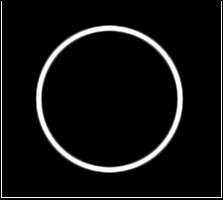

Target image showing Gradient filter for Prewitt operator


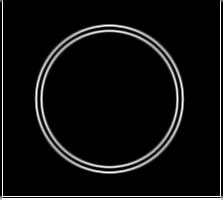

The time needed to detect the edges of the source image using Gradient filter for Prewitt operator is 0.8594009876251221 seconds.


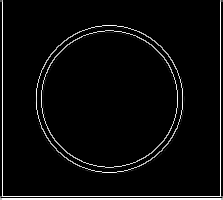

The time needed to detect the edges of the source image using Gradient Filter after NMS is 0.08342576026916504 seconds.


In [28]:
# Loads an image.
src = cv.imread("TestImages/all_png/cires0.png", cv.IMREAD_GRAYSCALE)
    
# Check if image is loaded correctly.
if src is None:
  print ('Error opening image!')  
  
else:
  # Show the source image.
  cv2_imshow(src)
  
  # Define row length and column length, as they will be widely used during the 
  # program.
  row_length = src.shape[0]
  col_length = src.shape[1]
  
  # Define the Prewitt Operator.
  gx = np.array(([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
  gy = gx.T
  
  # Define the output images.
  target_hor = np.zeros((row_length,col_length))
  target_ver = np.zeros((row_length,col_length))
  target = np.zeros((row_length,col_length))
  angle = np.zeros((row_length,col_length))
  nms_target = np.zeros((row_length,col_length))
  
  ### GRADIENT FILTER
  # Start measuring the execution time for Gradient Filter.
  start = time.time()
  
  # Compute the values for each of the pixels in the matrix, except the borders.
  for i in range(1, row_length-1):
    for j in range(1, col_length-1):
      target_hor[i,j] = np.sum(np.multiply(src[i-1:i+2, j-1:j+2],gx)) / 3
      target_ver[i,j] = np.sum(np.multiply(src[i-1:i+2, j-1:j+2],gy)) / 3
      target[i,j] = np.sqrt(target_hor[i,j]**2 + target_ver[i,j]**2)
      angle[i,j] = np.arctan2(target_hor[i,j],target_ver[i,j])
  
  # Now, compute the edges for firsts and lasts rows with the same value as the
  # pixel that it is next to it. 
  for i in range(row_length):  
    for a in range(2):
      target[i,1-a] = target[i,1]
      target[i,col_length-2+a] = target[i,col_length-2]
        
  # Now, compute the edges for firsts and lasts columns with the same value as 
  # the pixel that it is next to it.
  for j in range(col_length):
    for a in range(2):
      target[1-a,j] = target[1,j]
      target[row_length-2+a,j] = target[row_length-2,j]
  
  # Stop measuring the execution time for Gradient Filter.
  last = time.time()
  
  # Show the images after applying the Gradient Filter
  print("Target image showing Gradient filter for Prewitt operator")
  cv2_imshow(target)
  
  # Print out the execution time of the Gradient Filter.
  print("The time needed to detect the edges of the source image using Gradient filter for Prewitt operator is " + str(last - start) + " seconds.")
  
  ### GRADIENT FILTER AFTER NON-MAXIMUM SUPPRESSION.
  # Start measuring the execution time for Gradient Filter after NMS.
  start = time.time()
  
  angle = angle * 180 / np.pi
  angle[angle < 0] += 180
  
  # Find the position of such pixel and copy it into NMS target image.
  for i in range(1, row_length-1):
    for j in range(1, col_length-1):
      
      # Angle 0
      if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
        q = target[i, j+1]
        r = target[i, j-1]
       
      # Angle 45
      elif (22.5 <= angle[i,j] < 67.5):
        q = target[i-1, j-1]
        r = target[i+1, j+1]
               
      # Angle 90
      elif (67.5 <= angle[i,j] < 112.5):
        q = target[i+1, j]
        r = target[i-1, j]
                
      # Angle 135
      elif (112.5 <= angle[i,j] < 157.5):
        q = target[i+1, j-1]
        r = target[i-1, j+1]

      if (target[i,j] < q) or (target[i,j] < r):
        target[i,j] = 0
      
  # Stop measuring the execution time for Gradient Filter after NMS.
  last = time.time()
  
  # Show the image after applying the Gradient Filter after NMS.
  cv2_imshow(target)
  
  # Print out the execution time of the Gradient Filter after NMS.
  print("The time needed to detect the edges of the source image using Gradient Filter after NMS is " + str(last - start) + " seconds.")